<a href="https://colab.research.google.com/github/SAPUII/bsc_dpdm22/blob/main/Quiz_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#โจทย์
เตรียมข้อมูลของ กรม อุตุ ([link](https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)) ให้อยู่ในรูปแบบ ตารางด้านล่าง เพื่อเตรียมข้อมูลสำหรับสร้าง Model ทำนาย อุณภูมิต่ำสุดของวันจากค่าอื่นๆ

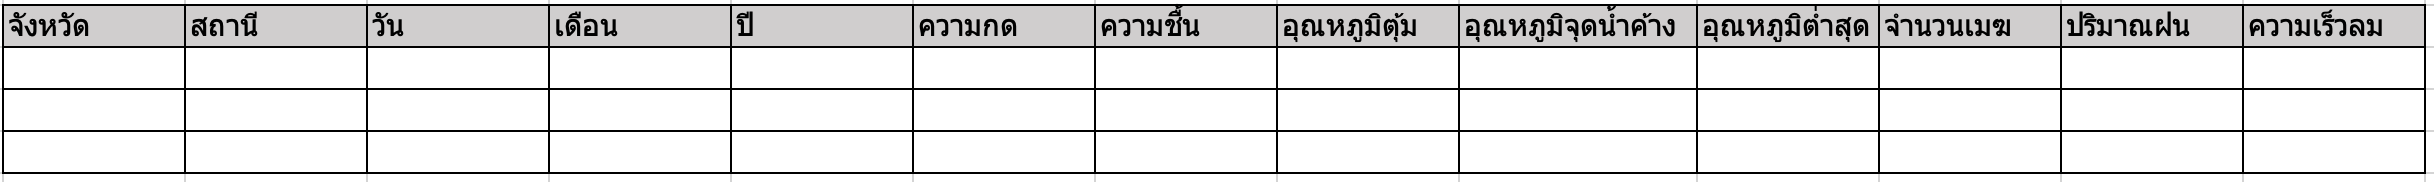

column เดือน-ปี สามารถยุบรวมเป็น 1 column ได้

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/อุตุ')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [7]:
!ls

'ความกด(เปอร์เซ็นต์)'  'อุณหภูมิต่ำสุด(เซลเซียส)'     'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'
'ปริมาณฝน(มิลลิเมตร)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'    'จำนวนเมฆ(10ส่วน)'
'ความเร็วลม(นอต)'    'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'


#ความกดอากาศ

In [8]:
airpressure_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
airpressure_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
airpressure_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
airpressure_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
airpressure_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [9]:
airpressure_KK.columns

Index(['ที่', 'สถานี', 'เดือน/ปี', 'วันที่', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'เฉลี่ย'],
      dtype='object')

In [10]:
airpressure_KK = airpressure_KK.rename(columns={ 'วันที่':'1','Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':"16",
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'})

In [11]:
airpressure = pd.concat([airpressure_KK,airpressure_NP,airpressure_SK,airpressure_NK,airpressure_L]) 
airpressure.shape

(275, 66)

In [12]:
airpressure_KK['เดือน'] = airpressure_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
airpressure_KK['ปี'] = airpressure_KK['เดือน/ปี'].dt.year

In [13]:
airpressure_KK = airpressure_KK[['ที่', 'สถานี', 'เดือน/ปี', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'เดือน', 'ปี','เฉลี่ย']]

In [14]:
airpressure_KK.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,เดือน,ปี,เฉลี่ย
1,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,10,2011,1010.350645
2,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,11,2011,1011.717000
3,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,12,2011,1016.470000
4,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1,2012,1012.484516
5,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,2,2012,1009.749667


In [15]:
del airpressure_KK['เดือน/ปี']

##วนลูป

In [16]:
for index, row in airpressure_KK.iterrows():
  for i in range(1,32):
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความกด -> ',row[i-1])

วันที่  1 เดือนที่  10  ปีที่  2011 ความกด ->  1  
วันที่  2 เดือนที่  10  ปีที่  2011 ความกด ->  352201-หนองคาย จ.หนองคาย
วันที่  3 เดือนที่  10  ปีที่  2011 ความกด ->  1005.47
วันที่  4 เดือนที่  10  ปีที่  2011 ความกด ->  1006.65
วันที่  5 เดือนที่  10  ปีที่  2011 ความกด ->  1007.49
วันที่  6 เดือนที่  10  ปีที่  2011 ความกด ->  1008.28
วันที่  7 เดือนที่  10  ปีที่  2011 ความกด ->  1009.88
วันที่  8 เดือนที่  10  ปีที่  2011 ความกด ->  1011.36
วันที่  9 เดือนที่  10  ปีที่  2011 ความกด ->  1011.17
วันที่  10 เดือนที่  10  ปีที่  2011 ความกด ->  1010.2
วันที่  11 เดือนที่  10  ปีที่  2011 ความกด ->  1010.14
วันที่  12 เดือนที่  10  ปีที่  2011 ความกด ->  1010.6
วันที่  13 เดือนที่  10  ปีที่  2011 ความกด ->  1010.04
วันที่  14 เดือนที่  10  ปีที่  2011 ความกด ->  1009.07
วันที่  15 เดือนที่  10  ปีที่  2011 ความกด ->  1008.45
วันที่  16 เดือนที่  10  ปีที่  2011 ความกด ->  1008.02
วันที่  17 เดือนที่  10  ปีที่  2011 ความกด ->  1009.2
วันที่  18 เดือนที่  10  ปีที่  2011 ความกด -> 

#ความชื้น

In [17]:
humidity_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
humidity_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
humidity_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
humidity_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
humidity_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [18]:
humidity_KK.columns

Index(['ที่', 'สถานี', 'เดือน/ปี', 'วันที่', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'เฉลี่ย'],
      dtype='object')

In [19]:
humidity_KK = humidity_KK.rename(columns={ 'วันที่':'1','Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':"16",
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'})

####วนลูป

In [20]:
humidity = pd.concat([humidity_KK,humidity_NP,humidity_SK,humidity_NK,humidity_L]) 
humidity.shape
humidity_KK['เดือน'] = humidity_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
humidity_KK['ปี'] = humidity_KK['เดือน/ปี'].dt.year
humidity_KK.head()
for index, row in humidity_KK.iterrows():
  for i in range(1,32):
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความชื้นสัมพัทธ์ -> ',row[i-1])



วันที่  1 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  1  
วันที่  2 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  381201-ขอนแก่น จ.ขอนแก่น
วันที่  3 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  2011-10-01 00:00:00
วันที่  4 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  83
วันที่  5 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  92
วันที่  6 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  86
วันที่  7 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  80
วันที่  8 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  86
วันที่  9 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  86
วันที่  10 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  83
วันที่  11 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  82
วันที่  12 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  82
วันที่  13 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  77
วันที่  14 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  78
วันที่  15 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ ->  86
วันที่  16 เดือนที่  10  ปีที่  2011 ความชื้นสัมพัทธ์ 

In [21]:
#humidity_KK1 = humidity_KK1[['จังหวัด','สถานี','เดือน','ปี']]
#humidity_KK1

In [22]:
#this_humidity = humidity2[humidity2['สถานี']==id] 


In [23]:
# record_list = list()
# for id in humidity2['สถานี']: 
#     print(id)
   
   

In [24]:
# names = ['humidity_KK', 'humidity_NP', 'humidity_SK', 'humidity_NK', 'humidity_L']
# # loop through list
# for n in names:
#     print(n)

In [25]:
# name = list()
# for humidity in humidity_KK,humidity_NP,humidity_SK,humidity_NK,humidity_L :
#     print(humidity)




In [26]:
# humidity_KK.columns

In [27]:
# humidity_KK.info()

#อุณหภูมิตุ้ม

In [28]:
Drybulb_tem_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
Drybulb_tem_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
Drybulb_tem_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
Drybulb_tem_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
Drybulb_tem_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [29]:
Drybulb_tem_KK = Drybulb_tem_KK.rename(columns={ 'วันที่':'1','Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':"16",
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'})

##วนลูป

In [30]:
Drybulb_tem = pd.concat([Drybulb_tem_KK,Drybulb_tem_NP,Drybulb_tem_SK,Drybulb_tem_NK,Drybulb_tem_L]) 
Drybulb_tem.shape
Drybulb_tem_KK['เดือน'] = Drybulb_tem_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
Drybulb_tem_KK['ปี'] = Drybulb_tem_KK['เดือน/ปี'].dt.year
Drybulb_tem_KK.head()
for index, row in Drybulb_tem_KK.iterrows():
  for i in range(1,32):
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิตุ้ม -> ',row[i-1])


วันที่  1 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  1  
วันที่  2 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  381201-ขอนแก่น จ.ขอนแก่น
วันที่  3 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  2011-10-01 00:00:00
วันที่  4 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  27.6
วันที่  5 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  25.6
วันที่  6 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  25.6
วันที่  7 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  25.8
วันที่  8 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  24.3
วันที่  9 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  24.0
วันที่  10 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  25.1
วันที่  11 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  27.0
วันที่  12 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  27.1
วันที่  13 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  27.5
วันที่  14 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  27.9
วันที่  15 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  26.4
วันที่  16 เดือนที่  10  ปีที่  2011 อุณหภูมิตุ้ม ->  26.4
วันที่  17 เดือนที่  10  ปีที่ 

#อุณหภูมิจุดน้ำค้าง

In [31]:
dew_tem_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
dew_tem_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
dew_tem_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
dew_tem_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
dew_tem_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [32]:
dew_tem_KK = dew_tem_KK.rename(columns={ 'วันที่':'1','Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':"16",
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'})

##concat

In [33]:
dew_tem = pd.concat([dew_tem_KK,dew_tem_NP,dew_tem_SK,dew_tem_NK,dew_tem_L]) 
dew_tem.shape

(270, 66)

##วนลูปแค่ 1 จังหวัด

In [34]:
dew_tem = pd.concat([dew_tem_KK,dew_tem_NP,dew_tem_SK,dew_tem_NK,dew_tem_L]) 
dew_tem.shape
dew_tem_KK['เดือน'] = dew_tem_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
dew_tem_KK['ปี'] = dew_tem_KK['เดือน/ปี'].dt.year
dew_tem_KK.head()
for index, row in dew_tem_KK.iterrows():
  for i in range(1,32):
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิจุดน้ำค้าง -> ',row[i-1])


วันที่  1 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  1  
วันที่  2 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  381201-ขอนแก่น จ.ขอนแก่น
วันที่  3 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  2011-10-01 00:00:00
วันที่  4 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  24.2
วันที่  5 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  24.0
วันที่  6 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  22.9
วันที่  7 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  21.9
วันที่  8 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  21.7
วันที่  9 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  21.3
วันที่  10 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  21.9
วันที่  11 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  23.3
วันที่  12 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  23.4
วันที่  13 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  22.7
วันที่  14 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  23.2
วันที่  15 เดือนที่  10  ปีที่  2011 อุณหภูมิจุดน้ำค้าง ->  23.8


#อุณหภูมิต่ำสุด

In [35]:
minimum_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
minimum_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
minimum_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
minimum_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
minimum_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [36]:
minimum_KK = minimum_KK.rename(columns={ 'วันที่':'1','Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':"16",
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'})

##concat

In [37]:
minimum = pd.concat([minimum_KK,minimum_NP,minimum_SK,minimum_NK,minimum_L]) 
minimum.shape

(275, 66)

##วนลูปแค่ 1 จังหวัด

In [38]:
minimum = pd.concat([minimum_KK,minimum_NP,minimum_SK,minimum_NK,minimum_L]) 
minimum.shape
minimum_KK['เดือน'] = minimum_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
minimum_KK['ปี'] = minimum_KK['เดือน/ปี'].dt.year
minimum_KK.head()
for index, row in minimum_KK.iterrows():
  for i in range(1,32):
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิต่ำสุด -> ',row[i-1])


วันที่  1 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  1  
วันที่  2 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  381201-ขอนแก่น จ.ขอนแก่น
วันที่  3 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  2011-10-01 00:00:00
วันที่  4 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  24.8
วันที่  5 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  23.0
วันที่  6 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  22.1
วันที่  7 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  22.8
วันที่  8 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  23.1
วันที่  9 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  21.7
วันที่  10 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  22.0
วันที่  11 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  23.2
วันที่  12 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  24.1
วันที่  13 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  23.2
วันที่  14 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  23.5
วันที่  15 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  23.7
วันที่  16 เดือนที่  10  ปีที่  2011 อุณหภูมิต่ำสุด ->  22.4

#ความเร็วลม

In [39]:
windspeed_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
windspeed_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
windspeed_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
windspeed_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
windspeed_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [40]:
windspeed_KK = windspeed_KK.rename(columns={ 'วันที่':'1','Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':"16",
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'})

##concat

In [41]:
windspeed = pd.concat([windspeed_KK,windspeed_NP,windspeed_SK,windspeed_NK,windspeed_L]) 
windspeed.shape

(275, 66)

##วนลูปแค่ 1 จังหวัด

In [42]:
windspeed = pd.concat([windspeed_KK,windspeed_NP,windspeed_SK,windspeed_NK,windspeed_L]) 
windspeed.shape
windspeed_KK['เดือน'] = windspeed_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
windspeed_KK['ปี'] = windspeed_KK['เดือน/ปี'].dt.year
windspeed_KK.head()
for index, row in windspeed_KK.iterrows():
  for i in range(1,32):
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความเร็วลม -> ',row[i-1])

วันที่  1 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  1  
วันที่  2 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  353301-เลย สกษ. จ.เลย
วันที่  3 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2011-10-01 00:00:00
วันที่  4 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  5 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  6 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  7 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  8 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  9 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  10 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  4
วันที่  11 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  12 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  4
วันที่  13 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  14 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  1
วันที่  15 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  16 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  17 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  18 เดือนที่  10  ปีที่  2011 ความเร็วลม -> 

#จำนวนเมฆ

In [43]:
cloud_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
cloud_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
cloud_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
cloud_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
cloud_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [44]:
cloud_KK = cloud_KK.rename(columns={ 'วันที่':'1','Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':"16",
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'})

##concat
ยังไม่ได้เอามาใช้

In [45]:
cloud = pd.concat([cloud_KK,cloud_NP,cloud_SK,cloud_NK,cloud_L]) 
cloud.shape

(275, 76)

##วนลูป

In [46]:
cloud = pd.concat([cloud_KK,cloud_NP,cloud_SK,cloud_NK,cloud_L]) 
cloud.shape
cloud_KK['เดือน'] = windspeed_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
cloud_KK['ปี'] = windspeed_KK['เดือน/ปี'].dt.year
cloud_KK.head()
for index, row in windspeed_KK.iterrows():
  for i in range(1,32):
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความเร็วลม -> ',row[i-1])

วันที่  1 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  1  
วันที่  2 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  353301-เลย สกษ. จ.เลย
วันที่  3 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2011-10-01 00:00:00
วันที่  4 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  5 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  6 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  7 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  8 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  9 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  10 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  4
วันที่  11 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  12 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  4
วันที่  13 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  3
วันที่  14 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  1
วันที่  15 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  16 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  17 เดือนที่  10  ปีที่  2011 ความเร็วลม ->  2
วันที่  18 เดือนที่  10  ปีที่  2011 ความเร็วลม -> 

#ปริมาณฝน

In [47]:
rain_KK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
rain_NP = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
rain_SK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
rain_NK = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)
rain_L = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'}).drop(0, axis=0)

In [48]:
rain = pd.concat([rain_KK,rain_NP,rain_SK,rain_NK,rain_L]) 
rain.shape
rain['สถานี']
rain_KK['เดือน'] = rain_KK['เดือน/ปี'].dt.month #การแยกเดือนปี
rain_KK['ปี'] = rain_KK['เดือน/ปี'].dt.year
rain_KK.head()
rain_KK['จังหวัด'] = 'ขอนแก่น' # apply the same value
rain_KK['ปริมาณฝน'] = 'ปริมาณฝน'
del rain_KK['เดือน/ปี']

for index,row in rain_KK.iterrows(): 
    if index < 32:
      print(f'วันที่', index,'เดือนที่ ',row['เดือน'],' ปีที่ ',row['ปี'],row['ปริมาณฝน'],row['เฉลี่ย'])

วันที่ 1 เดือนที่  10  ปีที่  2011 ปริมาณฝน 3.3548387096774195
วันที่ 2 เดือนที่  11  ปีที่  2011 ปริมาณฝน 3.466666666666667
วันที่ 3 เดือนที่  12  ปีที่  2011 ปริมาณฝน 4.806451612903226
วันที่ 4 เดือนที่  1  ปีที่  2012 ปริมาณฝน 3.129032258064516
วันที่ 5 เดือนที่  2  ปีที่  2012 ปริมาณฝน 2.566666666666667
วันที่ 6 เดือนที่  10  ปีที่  2012 ปริมาณฝน 3.225806451612903
วันที่ 7 เดือนที่  11  ปีที่  2012 ปริมาณฝน 2.6333333333333333
วันที่ 8 เดือนที่  12  ปีที่  2012 ปริมาณฝน 3.6451612903225805
วันที่ 9 เดือนที่  1  ปีที่  2013 ปริมาณฝน 3.4838709677419355
วันที่ 10 เดือนที่  2  ปีที่  2013 ปริมาณฝน 3.6333333333333333
วันที่ 11 เดือนที่  10  ปีที่  2013 ปริมาณฝน 3.064516129032258
วันที่ 12 เดือนที่  11  ปีที่  2013 ปริมาณฝน 3.8
วันที่ 13 เดือนที่  12  ปีที่  2013 ปริมาณฝน 4.193548387096774
วันที่ 14 เดือนที่  1  ปีที่  2014 ปริมาณฝน 3.806451612903226
วันที่ 15 เดือนที่  2  ปีที่  2014 ปริมาณฝน 3.033333333333333
วันที่ 16 เดือนที่  10  ปีที่  2014 ปริมาณฝน 3.161290322580645
วันที่ 17 เดือนท